In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.drop('CustomerID',axis=1,inplace=True)

In [7]:
df1=df.copy()

In [8]:
df1['Gender'] = df['Genre'].map({'Male':1,'Female':2})

In [9]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Gender
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [11]:
df1 = df1.drop(['Genre'],axis=1)

In [12]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2


In [13]:
model = KMeans(n_clusters=2)
model.fit(df1)

KMeans(n_clusters=2)

In [14]:
labels = model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

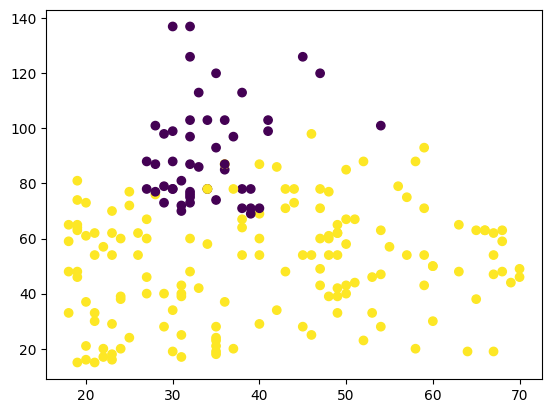

In [15]:
plt.scatter(df['Age'],df['Annual Income (k$)'],c=labels)

In [16]:
model.inertia_


221136.44188596494

In [17]:
inertia = []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(df1)
  inertia.append(model.inertia_)
inertia

[308862.06,
 225478.44076498522,
 157981.67447892812,
 110045.92297541512,
 85679.73322625124,
 58350.65449462819,
 51201.740785418944,
 48467.33984004502,
 40895.6333004958,
 38767.3915947941]

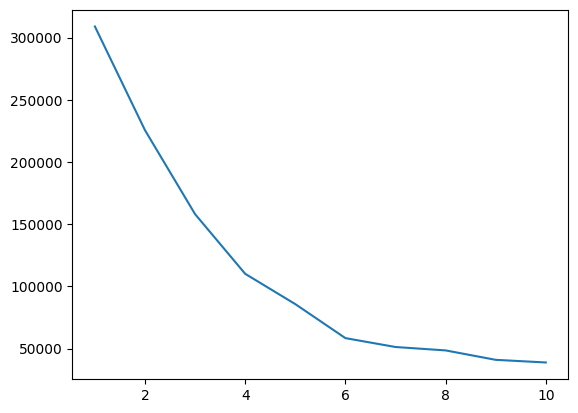

In [18]:
plt.plot(range(1,11),inertia)

In [19]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [20]:
from kneed import KneeLocator

In [21]:
k = list(range(1,11))
k_value = KneeLocator(k,inertia, curve = 'convex',direction='decreasing')
k_value.elbow

np.int64(4)

In [22]:
model = KMeans(n_clusters=k_value.elbow)
model.fit(df1)

KMeans(n_clusters=np.int64(4))

In [23]:
labels = model.labels_
labels

array([3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

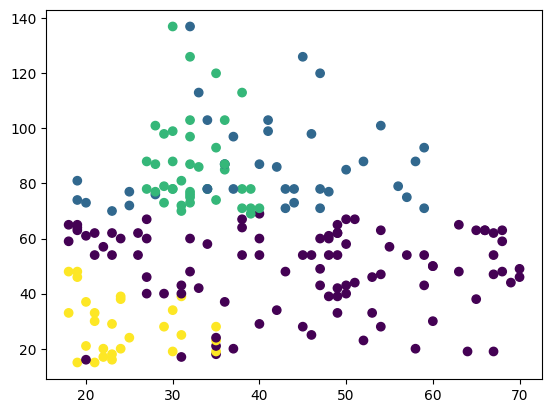

In [24]:
plt.scatter(df1['Age'],df1['Annual Income (k$)'],c=labels)

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(df1,labels)

np.float64(0.4067767360772861)

In [26]:
df['cluster']=labels

In [27]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


In [28]:
df.to_csv("final.csv", index=False)

In [29]:
'''from sklearn.cluster import DBSCAN'''

'from sklearn.cluster import DBSCAN'

In [30]:
'''model_dbs = DBSCAN(eps = 0.01,min_samples=3)
model_dbs.fit(df1)'''

'model_dbs = DBSCAN(eps = 0.01,min_samples=3)\nmodel_dbs.fit(df1)'

In [31]:
'''labels = model_dbs.labels_
labels'''

'labels = model_dbs.labels_\nlabels'

In [32]:
'''plt.scatter(df['Age'],df['Annual Income (k$)'],c=labels)'''

"plt.scatter(df['Age'],df['Annual Income (k$)'],c=labels)"

In [33]:
'''silhouette_score(df1,labels)'''

'silhouette_score(df1,labels)'

In [34]:
'''from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster'''

'from sklearn.cluster import AgglomerativeClustering\nfrom scipy.cluster.hierarchy import dendrogram, linkage, fcluster'

In [35]:
'''link = linkage(df1, method = 'ward')
dendrogram(link, orientation='top', distance_sort='ascending')
plt.axhline(20)'''

"link = linkage(df1, method = 'ward')\ndendrogram(link, orientation='top', distance_sort='ascending')\nplt.axhline(20)"

In [36]:
'''clusters = fcluster(link,t=20, criterion = 'distance')
n = clusters.max()'''

"clusters = fcluster(link,t=20, criterion = 'distance')\nn = clusters.max()"

In [37]:
'''n'''

'n'

In [38]:
'''model_agg = AgglomerativeClustering(n_clusters=n)
model_agg.fit(df1)'''

'model_agg = AgglomerativeClustering(n_clusters=n)\nmodel_agg.fit(df1)'

In [39]:
'''labels = model_agg.labels_'''

'labels = model_agg.labels_'

In [40]:
'''plt.scatter(df1['Age'],df1['Annual Income (k$)'],c=labels)'''

"plt.scatter(df1['Age'],df1['Annual Income (k$)'],c=labels)"

In [41]:
'''silhouette_score(df1,labels)'''

'silhouette_score(df1,labels)'

In [42]:
import pickle

In [43]:
with open('final_model.pkl','wb') as file:
  pickle.dump(model,file)

In [44]:
df['cluster']=labels